# Predicting Possible Loan Defaults

Author: Necky Tran <br>
Date: 31/01/24

### Table of Contents

1. [Introduction](#Introduction)
2. [Cleaning](#Cleaning)
3. [Statistical Analysis](#Statistical_Analysis)
4. [Linear Regression](#Linear)
5. [Summary](#Summary)

# Introduction
This notebook contains a Loan Classification Dataset. The dataset is sourced from Kaggle : https://www.kaggle.com/datasets/abhishek14398/loan-dataset/data
-  The objective is to efficiently train classification models and compare their performance
-  Due to the dataset's size and complexity, extensive Exploratory Data Analysis (EDA) will be limited. Instead, I will manually select features deemed suitable for the model
-  The model's aim is to forecast the likelihood of customers defaulting on loans.


| Feature | Description |
|----------|----------|
|loan_status| Current status of the loan (Target variable)|
|annual_inc|The self-reported annual income provided by the borrower during registration.|
|dti|A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.|
|grade|LC assigned loan grade|
|home_ownership|The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER|
|inq_last_6mths|The number of inquiries in past 6 months (excluding auto and mortgage inquiries)|
|installment|The monthly payment owed by the borrower if the loan originates.|
|int_rate|Interest Rate on the loan|
|loan_amnt|The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value|
|open_acc|The number of open credit lines in the borrower's credit file.|
|pub_rec|Number of derogatory public records|
|purpose| A category provided by the borrower for the loan request|
|sub_grade| LC assigned loan subgrade|
|revol_bal| Total credit revolving balance|
|term| The number of payments on the loan. Values are in months and can be either 36 or 60|
|total_acc| The total number of credit lines currently in the borrower's credit file|
|total_rec_late_fee|Late fees received to date|
|verification_status| Indicates if income was verified by LC, not verified, or if the income source was verified|



# Cleaning
- select the features and quickly examine distributions/multicolinearity

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
# load data
loan_df = pd.read_csv('loan_data.csv')
# view first rows
loan_df.head()

C:\Users\trann\AppData\Local\Temp\ipykernel_8272\1077288624.py:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_df = pd.read_csv('loan_data.csv')


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [59]:
# Check Shape, Info(Number of Rows and Columns) and datatype of loan data

print("Shape of the data frame :",loan_df.shape)
print("===================================================")
print(loan_df.info())

Shape of the data frame : (39717, 111)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None


Rows: 39717 <br>
Columns : 111

From the first look into the data, it looks like some columns are filled with NaN values. Locate them and remove

In [60]:
# Create a boolean mask of NaN values, True = NaN
nan_mask = loan_df.isna()

# Check if all values in each column are True (i.e., all NaN)
columns_with_only_nan = nan_mask.all()

# Extract column names with only NaN values
empty = columns_with_only_nan[columns_with_only_nan].index

print("Columns with only NaN values:", list(empty))

print("# of Columns with only NaN values:", len(empty))

Columns with only NaN values: ['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_

In [61]:
# drop empty columns
loan_df = loan_df.drop(columns = empty)

In [62]:
# check new shape
loan_df.shape

(39717, 57)

In [63]:
# sum missing data and sort
loan_df.isna().sum().sort_values(ascending=False)

next_pymnt_d                  38577
mths_since_last_record        36931
mths_since_last_delinq        25682
desc                          12940
emp_title                      2459
emp_length                     1075
pub_rec_bankruptcies            697
last_pymnt_d                     71
chargeoff_within_12_mths         56
collections_12_mths_ex_med       56
revol_util                       50
tax_liens                        39
title                            11
last_credit_pull_d                2
home_ownership                    0
int_rate                          0
out_prncp_inv                     0
total_pymnt                       0
total_pymnt_inv                   0
total_rec_prncp                   0
total_rec_int                     0
total_rec_late_fee                0
recoveries                        0
collection_recovery_fee           0
term                              0
last_pymnt_amnt                   0
initial_list_status               0
funded_amnt_inv             

Drop columns with null values

In [64]:
# Find columns with missing data
columns_with_missing_data = loan_df.columns[loan_df.isna().any()].tolist()

# Drop columns with missing data from the original DataFrame
loan_df = loan_df.drop(columns=columns_with_missing_data)

In [65]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 43 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  home_ownership           39717 non-null  object 
 11  annual_inc               39717 non-null  float64
 12  verification_status      39717 non-null  object 
 13  issue_d                  39717 non-null  object 
 14  loan_status           

Loan Status is our target variable
- it predicts if a person has fully paid off their loan or defaulted ('charged off')

In [66]:
# check distribution of loan status
loan_df['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

Remove Rows that are current customers, and remove other features that we do not think will be imporant (ex. policy_code)

In [67]:
loan_df = loan_df[loan_df.loan_status != "Current"]

In [68]:
loan_df['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

In [69]:
loan_df['loan_status'].value_counts()*100/len(loan_df)

Fully Paid     85.413588
Charged Off    14.586412
Name: loan_status, dtype: float64

Our target variable has about a 85/15 percent split <br>
Find Columns to remove that will not help with predictions: <br>
id, member_id, url, zip_code, addr_state, issue_d, initial_list_status, policy_code, acc_now_delinq, delinq_amnt, out_prncp, out_prncp_inv <br>

In [14]:
columns_to_drop = ['id', 'member_id', 'url', 'zip_code', 'addr_state', 'issue_d', 'initial_list_status', 'policy_code', 'acc_now_delinq', 'delinq_amnt', 'out_prncp', 'out_prncp_inv']

In [15]:
loan_df = loan_df.drop(columns=columns_to_drop)

In [72]:
loan_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'url', 'purpose', 'zip_code', 'addr_state',
       'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt', 'policy_code',
       'application_type', 'acc_now_delinq', 'delinq_amnt'],
      dtype='object')

In [101]:
loan_df['home_ownership'].value_counts()

RENT        18480
MORTGAGE    17021
OWN          2975
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

In [16]:
loan_df.shape

(38577, 31)

Now remove columns that are multi-collinear

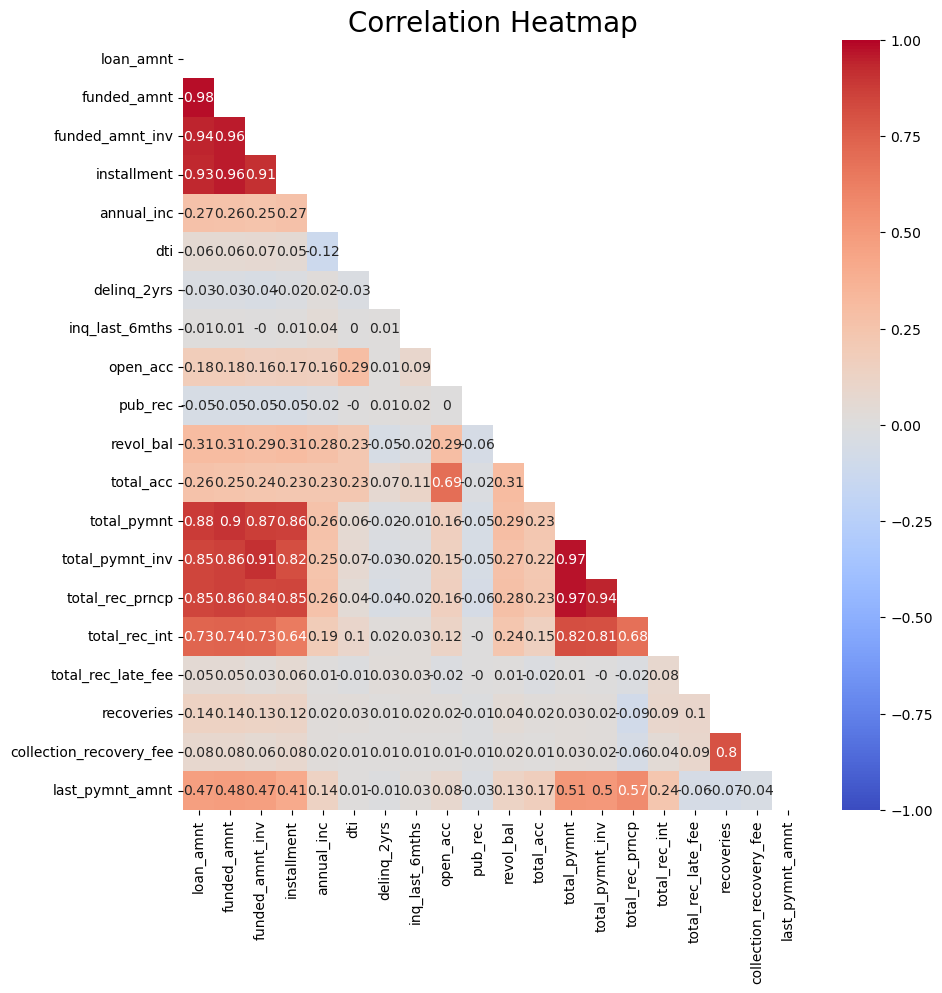

In [17]:
plt.figure(figsize=(10,10))
sns.heatmap(loan_df.corr().round(2), annot = True, cmap = 'coolwarm', vmin = -1, vmax = 1, mask = np.triu(loan_df.corr()) )
plt.title('Correlation Heatmap', size = 20)
plt.show()

Remove multicollinear variables
- funded_amnt, funded_amnt_inv, installment, total_pymnt, total_pyment_inv, total_rec_prncp, total_rec_int

In [18]:
loan_df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'home_ownership', 'annual_inc',
       'verification_status', 'loan_status', 'pymnt_plan', 'purpose', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'total_acc', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt', 'application_type'],
      dtype='object')

In [19]:
columns_to_drop = ['funded_amnt', 'funded_amnt_inv', 'installment', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'collection_recovery_fee']
loan_df = loan_df.drop(columns=columns_to_drop)

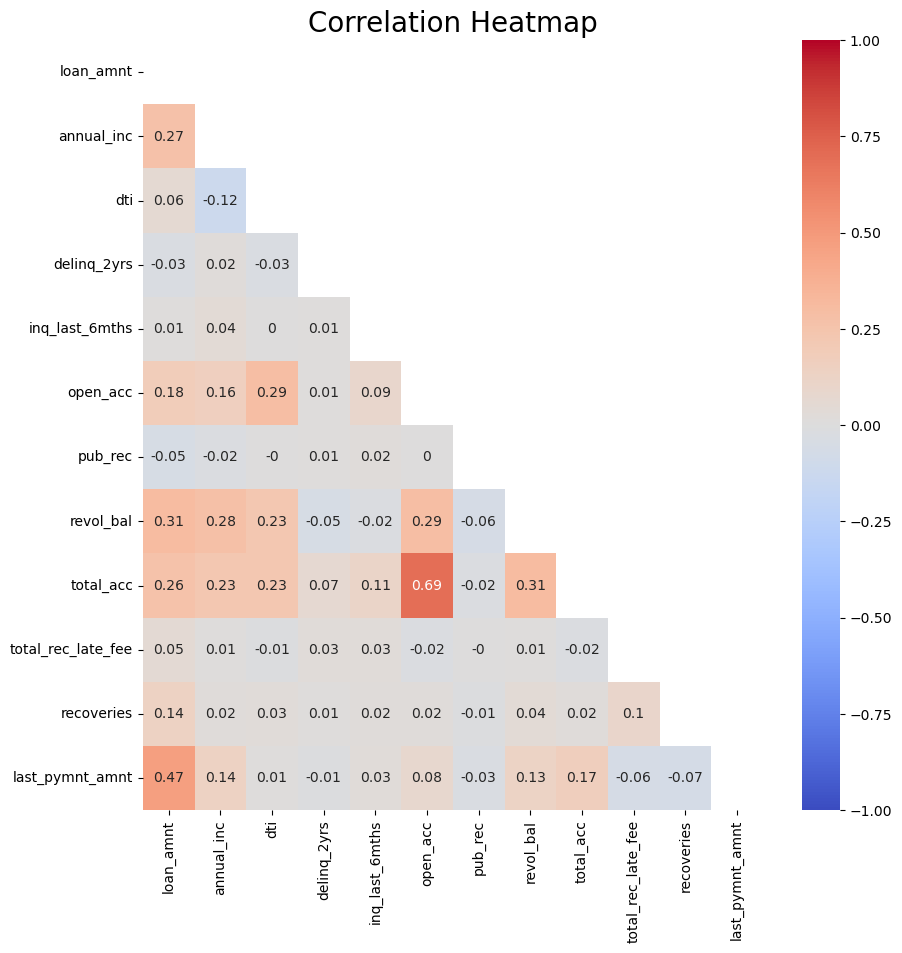

In [20]:
plt.figure(figsize=(10,10))
sns.heatmap(loan_df.corr().round(2), annot = True, cmap = 'coolwarm', vmin = -1, vmax = 1, mask = np.triu(loan_df.corr()) )
plt.title('Correlation Heatmap', size = 20)
plt.show()

In [21]:
loan_df.columns

Index(['loan_amnt', 'term', 'int_rate', 'grade', 'sub_grade', 'home_ownership',
       'annual_inc', 'verification_status', 'loan_status', 'pymnt_plan',
       'purpose', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'total_acc', 'total_rec_late_fee',
       'recoveries', 'last_pymnt_amnt', 'application_type'],
      dtype='object')

In [22]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38577 non-null  int64  
 1   term                 38577 non-null  object 
 2   int_rate             38577 non-null  object 
 3   grade                38577 non-null  object 
 4   sub_grade            38577 non-null  object 
 5   home_ownership       38577 non-null  object 
 6   annual_inc           38577 non-null  float64
 7   verification_status  38577 non-null  object 
 8   loan_status          38577 non-null  object 
 9   pymnt_plan           38577 non-null  object 
 10  purpose              38577 non-null  object 
 11  dti                  38577 non-null  float64
 12  delinq_2yrs          38577 non-null  int64  
 13  earliest_cr_line     38577 non-null  object 
 14  inq_last_6mths       38577 non-null  int64  
 15  open_acc             38577 non-null 

In [23]:
loan_df.head()

,loan_amnt,term,int_rate,grade,sub_grade,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,...,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,total_rec_late_fee,recoveries,last_pymnt_amnt,application_type
0,5000,36 months,10.65%,B,B2,RENT,24000.0,Verified,Fully Paid,n,...,Jan-85,1,3,0,13648,9,0.00,0.00,171.62,INDIVIDUAL
1,2500,60 months,15.27%,C,C4,RENT,30000.0,Source Verified,Charged Off,n,...,Apr-99,5,3,0,1687,4,0.00,117.08,119.66,INDIVIDUAL
2,2400,36 months,15.96%,C,C5,RENT,12252.0,Not Verified,Fully Paid,n,...,Nov-01,2,2,0,2956,10,0.00,0.00,649.91,INDIVIDUAL
3,10000,36 months,13.49%,C,C1,RENT,49200.0,Source Verified,Fully Paid,n,...,Feb-96,1,10,0,5598,37,16.97,0.00,357.48,INDIVIDUAL
5,5000,36 months,7.90%,A,A4,RENT,36000.0,Source Verified,Fully Paid,n,...,Nov-04,3,9,0,7963,12,0.00,0.00,161.03,INDIVIDUAL


In [24]:
loan_df['pymnt_plan'].value_counts()

n    38577
Name: pymnt_plan, dtype: int64

In [25]:
loan_df['earliest_cr_line'].value_counts()

Oct-99    360
Nov-98    357
Oct-00    341
Dec-98    340
Dec-97    318
         ... 
Nov-65      1
Feb-73      1
Oct-08      1
Dec-61      1
Oct-74      1
Name: earliest_cr_line, Length: 524, dtype: int64

In [26]:
loan_df['term'].value_counts()

 36 months    29096
 60 months     9481
Name: term, dtype: int64

In [27]:
loan_df['application_type'].value_counts()

INDIVIDUAL    38577
Name: application_type, dtype: int64

In [28]:
loan_df['purpose'].value_counts()

debt_consolidation    18055
credit_card            5027
other                  3865
home_improvement       2875
major_purchase         2150
small_business         1754
car                    1499
wedding                 926
medical                 681
moving                  576
vacation                375
house                   367
educational             325
renewable_energy        102
Name: purpose, dtype: int64

In [29]:
columns_to_drop = ['pymnt_plan', 'application_type', 'earliest_cr_line']
loan_df = loan_df.drop(columns=columns_to_drop)

In [30]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38577 non-null  int64  
 1   term                 38577 non-null  object 
 2   int_rate             38577 non-null  object 
 3   grade                38577 non-null  object 
 4   sub_grade            38577 non-null  object 
 5   home_ownership       38577 non-null  object 
 6   annual_inc           38577 non-null  float64
 7   verification_status  38577 non-null  object 
 8   loan_status          38577 non-null  object 
 9   purpose              38577 non-null  object 
 10  dti                  38577 non-null  float64
 11  delinq_2yrs          38577 non-null  int64  
 12  inq_last_6mths       38577 non-null  int64  
 13  open_acc             38577 non-null  int64  
 14  pub_rec              38577 non-null  int64  
 15  revol_bal            38577 non-null 

In [31]:
loan_df['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

In [32]:
loan_df['loan_status_paid'] = np.where(loan_df['loan_status'] == 'Fully Paid', 0, 1)

In [33]:
loan_df['loan_status_paid'].value_counts()

0    32950
1     5627
Name: loan_status_paid, dtype: int64

In [34]:
loan_df = loan_df.drop(columns=['loan_status'])

In [35]:
# Get a list of all categorical columns
categorical_columns = loan_df.select_dtypes(include=['object']).columns

# Perform one-hot encoding
df_encoded = pd.get_dummies(loan_df, columns=categorical_columns, drop_first=True)

# Display the encoded DataFrame
print(df_encoded)

       loan_amnt  annual_inc    dti  delinq_2yrs  inq_last_6mths  open_acc  \
0           5000     24000.0  27.65            0               1         3   
1           2500     30000.0   1.00            0               5         3   
2           2400     12252.0   8.72            0               2         2   
3          10000     49200.0  20.00            0               1        10   
5           5000     36000.0  11.20            0               3         9   
...          ...         ...    ...          ...             ...       ...   
39712       2500    110000.0  11.33            0               0        13   
39713       8500     18000.0   6.40            1               1         6   
39714       5000    100000.0   2.30            0               0        11   
39715       5000    200000.0   3.72            0               0        17   
39716       7500     22000.0  14.29            1               0         7   

       pub_rec  revol_bal  total_acc  total_rec_late_fee  ...  

In [36]:
df_encoded.head()

,loan_amnt,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,total_rec_late_fee,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,5000,24000.0,27.65,0,1,3,0,13648,9,0.00,...,0,0,0,0,0,0,0,0,0,0
1,2500,30000.0,1.00,0,5,3,0,1687,4,0.00,...,0,0,0,0,0,0,0,0,0,0
2,2400,12252.0,8.72,0,2,2,0,2956,10,0.00,...,0,0,0,0,0,0,0,1,0,0
3,10000,49200.0,20.00,0,1,10,0,5598,37,16.97,...,0,0,0,0,0,1,0,0,0,0
5,5000,36000.0,11.20,0,3,9,0,7963,12,0.00,...,0,0,0,0,0,0,0,0,0,1


In [37]:
df_encoded.shape

(38577, 442)

In [38]:
df_encoded.columns

Index(['loan_amnt', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'total_acc', 'total_rec_late_fee',
       ...
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding'],
      dtype='object', length=442)

In [39]:
df_encoded['loan_status_paid']

0        0
1        1
2        0
3        0
5        0
        ..
39712    0
39713    0
39714    0
39715    0
39716    0
Name: loan_status_paid, Length: 38577, dtype: int32

# Predictions
- SKlearn Library
    - train and test split, cross validation
    - Classification Models: LogReg, KNN, DT, SVM, Gradient Boost, Naive Bayes

https://scikit-learn.org/stable/auto_examples/model_selection/plot_cv_indices.html#sphx-glr-auto-examples-model-selection-plot-cv-indices-py

In [40]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [41]:
# train model

# target
y = df_encoded['loan_status_paid']
# features
X= df_encoded.drop(['loan_status_paid'], axis=1)

In [42]:
# Step 1: Create a train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 1.2: Create a train-test split for validation data
X_train_val, X_val, y_train_val, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# Step 2: Further split the training set into training and validation sets using k-fold cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create a logistic regression model
logreg_model = LogisticRegression(penalty = 'l2', C= 0.1, max_iter = 1000) 

# Step 3: Train and validate the model using k-fold cross-validation on the validation data
cv_scores = cross_val_score(logreg_model, X_train_val, y_train_val, cv=kf, scoring='accuracy')

# Print cross-validation results
print("Cross-Validation Accuracy Scores:")
print(cv_scores)
print(f'Mean CV Accuracy: {cv_scores.mean():.2f}')

Cross-Validation Accuracy Scores:
[0.96392309 0.96003456 0.96500324 0.9617628  0.96111471]
Mean CV Accuracy: 0.96


In [43]:
# Step 4: Train the final model on the full training set
logreg_model.fit(X_train, y_train)

# Step 5: Evaluate the final model on the test set
test_predictions = logreg_model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)
print(f'Test Accuracy: {test_accuracy:.2f}')

Test Accuracy: 0.96


In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier

In [45]:
dt_model = RandomForestClassifier(min_samples_split = 10)
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(dt_model, X_train_val, y_train_val, cv=kf, scoring='accuracy')
# Print cross-validation results
print("Cross-Validation Accuracy Scores:")
print(cv_scores)
print(f'Mean CV Accuracy: {cv_scores.mean():.2f}')

Cross-Validation Accuracy Scores:
[0.96608339 0.96003456 0.96586736 0.96284295 0.96219486]
Mean CV Accuracy: 0.96


In [46]:
gb_model = GradientBoostingClassifier(min_samples_split = 10)
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(gb_model, X_train_val, y_train_val, cv=kf, scoring='accuracy')
# Print cross-validation results
print("Cross-Validation Accuracy Scores:")
print(cv_scores)
print(f'Mean CV Accuracy: {cv_scores.mean():.2f}')

Cross-Validation Accuracy Scores:
[0.9669475  0.96219486 0.96759559 0.96521927 0.96349103]
Mean CV Accuracy: 0.97


In [47]:
knn_model = KNeighborsClassifier()
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(knn_model, X_train_val, y_train_val, cv=kf, scoring='accuracy')
# Print cross-validation results
print("Cross-Validation Accuracy Scores:")
print(cv_scores)
print(f'Mean CV Accuracy: {cv_scores.mean():.2f}')

Cross-Validation Accuracy Scores:
[0.84316267 0.84834738 0.84208252 0.84273061 0.84575502]
Mean CV Accuracy: 0.84


In [48]:
bayes_model = GaussianNB()
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(bayes_model, X_train_val, y_train_val, cv=kf, scoring='accuracy')
# Print cross-validation results
print("Cross-Validation Accuracy Scores:")
print(cv_scores)
print(f'Mean CV Accuracy: {cv_scores.mean():.2f}')

Cross-Validation Accuracy Scores:
[0.95722618 0.95484986 0.95917045 0.95636207 0.95679412]
Mean CV Accuracy: 0.96


In [49]:
model_test = [logreg_model, dt_model, gb_model, knn_model, bayes_model]

In [50]:
for i, e in enumerate(model_test):

    e.fit(X_train, y_train)
    test_predictions = e.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_predictions)

    print(i, e, test_accuracy)

0 LogisticRegression(C=0.1, max_iter=1000) 0.9633229652669777
1 RandomForestClassifier(min_samples_split=10) 0.963841368584759
2 GradientBoostingClassifier(min_samples_split=10) 0.9657853810264385
3 KNeighborsClassifier() 0.8519958527734578
4 GaussianNB() 0.9578797304302747


In [51]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(gb_model, X_train_val, y_train_val, cv=kf, scoring='accuracy')
# Print cross-validation results
print("Cross-Validation Accuracy Scores:")
print(cv_scores)
print(f'Mean CV Accuracy: {cv_scores.mean():.2f}')

Cross-Validation Accuracy Scores:
[0.9669475  0.96219486 0.96737956 0.96521927 0.96349103]
Mean CV Accuracy: 0.97


In [52]:
xgb_model.fit(X_train, y_train)

# Step 5: Evaluate the final model on the test set
test_predictions = xgb_model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)
print(f'Test Accuracy: {test_accuracy:.2f}')

Test Accuracy: 0.97


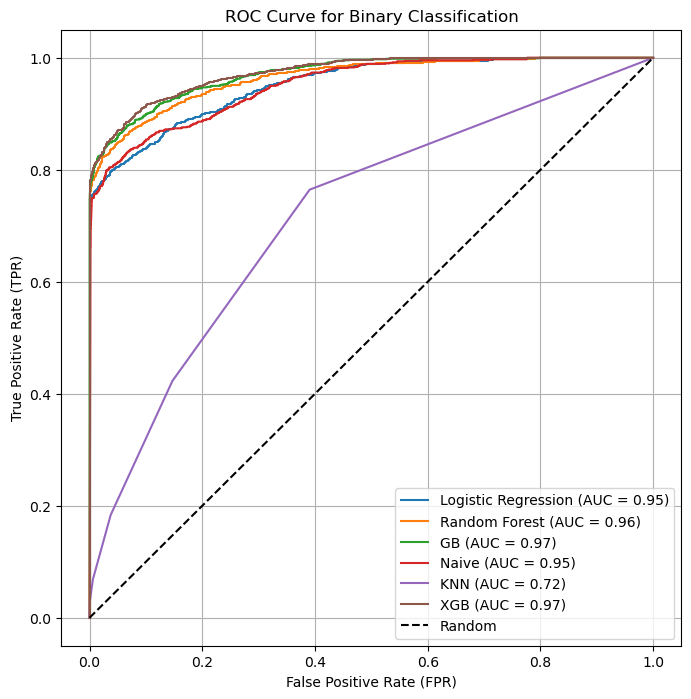

In [53]:
from sklearn.metrics import roc_curve, auc

# Create train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = [
    ('Logistic Regression', LogisticRegression(penalty = 'l2', C= 0.1, max_iter = 1000)),
    ('Random Forest', RandomForestClassifier(min_samples_split = 10)),
    ('GB', GradientBoostingClassifier(min_samples_split = 10)),
    ('Naive', GaussianNB()),
    ('KNN', KNeighborsClassifier()),
    ('XGB', XGBClassifier())
]

# Plot ROC curves for each model
plt.figure(figsize=(8, 8))

for name, model in models:
    # Train the model
    model.fit(X_train, y_train)

    # Predict probabilities
    y_prob = model.predict_proba(X_test)[:, 1]

    # Compute ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot the diagonal line (random classifier)
plt.plot([0, 1], [0, 1], 'k--', label='Random')

# Customize the plot
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Binary Classification')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [54]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Create train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = [
    ('Logistic Regression', LogisticRegression(penalty = 'l2', C= 0.1, max_iter = 1000)),
    ('Random Forest', RandomForestClassifier(min_samples_split = 10)),
    ('GB', GradientBoostingClassifier(min_samples_split = 10)),
    ('Naive', GaussianNB()),
    ('KNN', KNeighborsClassifier()),
    ('XGB', XGBClassifier())
]

# Print header
print(f"{'Model':<20} {'Precision':<20} {'Recall':<20} {'F1 Score':<20}")

# Loop through models
for name, model in models:
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate precision, recall, and F1 score
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Print results
    print(f"{name:<20} {precision:<20.2f} {recall:<20.2f} {f1:<20.2f}")


Model                Precision            Recall               F1 Score            
Logistic Regression  1.00                 0.75                 0.85                
Random Forest        1.00                 0.75                 0.85                
GB                   0.99                 0.77                 0.87                
Naive                0.93                 0.76                 0.84                
KNN                  0.45                 0.18                 0.26                
XGB                  0.97                 0.79                 0.87                


In [55]:
predictions = logreg_model.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report
class_report = classification_report(y_test, predictions)
print("Classification Report:")
print(class_report)

Accuracy: 0.96
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      6621
           1       1.00      0.75      0.85      1095

    accuracy                           0.96      7716
   macro avg       0.98      0.87      0.92      7716
weighted avg       0.96      0.96      0.96      7716



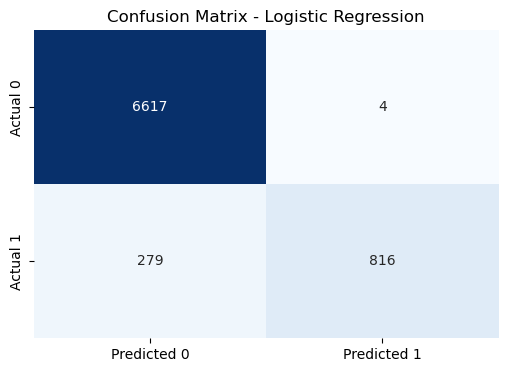

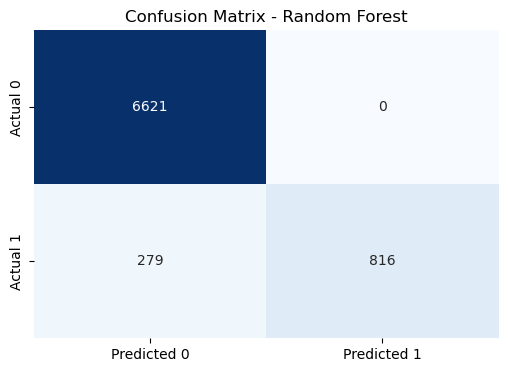

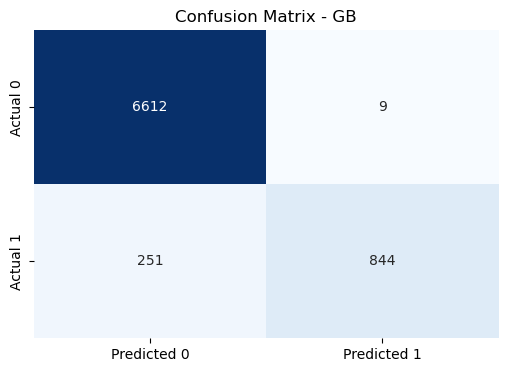

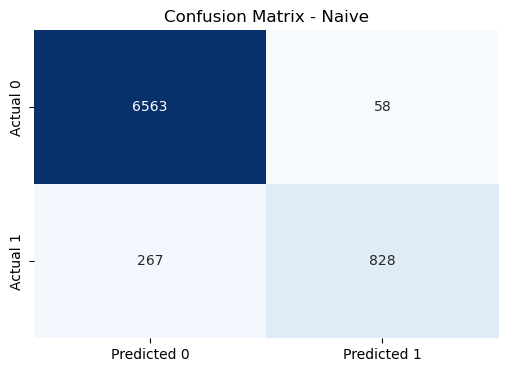

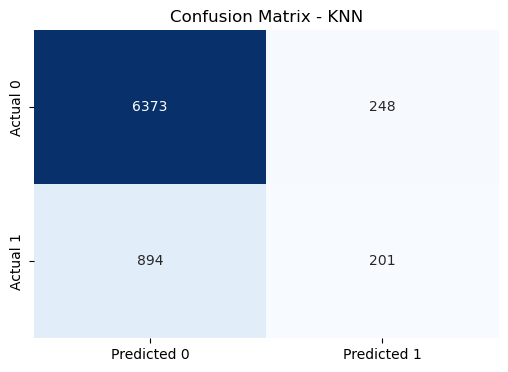

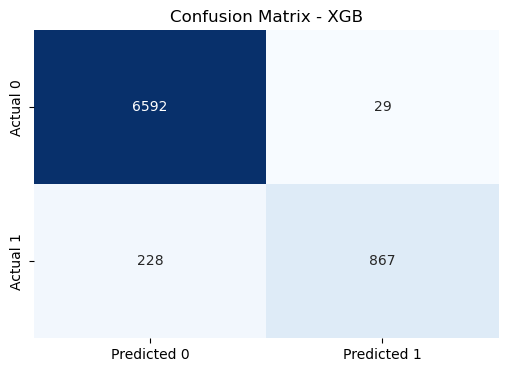

In [56]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define models
models = [
    ('Logistic Regression', LogisticRegression(penalty = 'l2', C= 0.1, max_iter = 1000)),
    ('Random Forest', RandomForestClassifier(min_samples_split = 10)),
    ('GB', GradientBoostingClassifier(min_samples_split = 10)),
    ('Naive', GaussianNB()),
    ('KNN', KNeighborsClassifier()),
    ('XGB', XGBClassifier())
]

# Loop through models
for name, model in models:
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Display confusion matrix with heatmap
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    plt.title(f'Confusion Matrix - {name}')
    plt.show()
